# Segmentation

This notebook predicts the binary mask of squares/circles from RGB images.

In [1]:
import matplotlib.pyplot as plt
from torch import optim
from torch import nn

from cnn_framework.dummy_segmentation.data_set import DummyDataSet
from cnn_framework.dummy_segmentation.model_params import DummyModelParams
from cnn_framework.dummy_segmentation.model import UNet

from cnn_framework.utils.data_loader_generators.data_loader_generator import DataLoaderGenerator
from cnn_framework.utils.model_managers.model_manager import ModelManager
from cnn_framework.utils.data_managers.default_data_manager import DefaultDataManager
from cnn_framework.utils.metrics.pcc import PCC

c:\Users\thoma\anaconda3\envs\pytorch-env2\lib\site-packages\pydantic\_migration.py:281: UserWarning: `pydantic.error_wrappers:ValidationError` has been moved to `pydantic:ValidationError`.
  warnings.warn(f'`{import_path}` has been moved to `{new_location}`.')


In [2]:
params = DummyModelParams()
params.update()

print(f"\nModel will be saved in {params.models_folder}")
print(f"Predictions will be saved in {params.output_dir}")
print(f"Tensorboard logs will be saved in {params.tensorboard_folder_path}")

Model time id: 20231117-163338-local
epochs 50 | batch 32 | lr 0.0001 | weight decay 0.0 | dropout 0.0 | c [0, 1, 2] | z [0]

Model will be saved in C:\Users\thoma\cnn_framework\src\cnn_framework\data\models/dummy_segmentation/20231117-163338-local
Predictions will be saved in C:\Users\thoma\cnn_framework\src\cnn_framework\data\predictions/dummy_segmentation/20231117-163338-local
Tensorboard logs will be saved in C:\Users\thoma\cnn_framework\src\cnn_framework\data\tensorboard/20231117-163338-local_dummy_segmentation


In [3]:
loader_generator = DataLoaderGenerator(params, DummyDataSet, DefaultDataManager)
train_dl, val_dl, test_dl = loader_generator.generate_data_loader()

### Data source ###
train data is loaded from C:\Users\thoma\cnn_framework\src\cnn_framework\data\images - 80% elements
val data is loaded from C:\Users\thoma\cnn_framework\src\cnn_framework\data\images - 10% elements
test data is loaded from C:\Users\thoma\cnn_framework\src\cnn_framework\data\images - 10% elements
###################
train has 1600 images.
val has 200 images.
test has 200 images.
###################


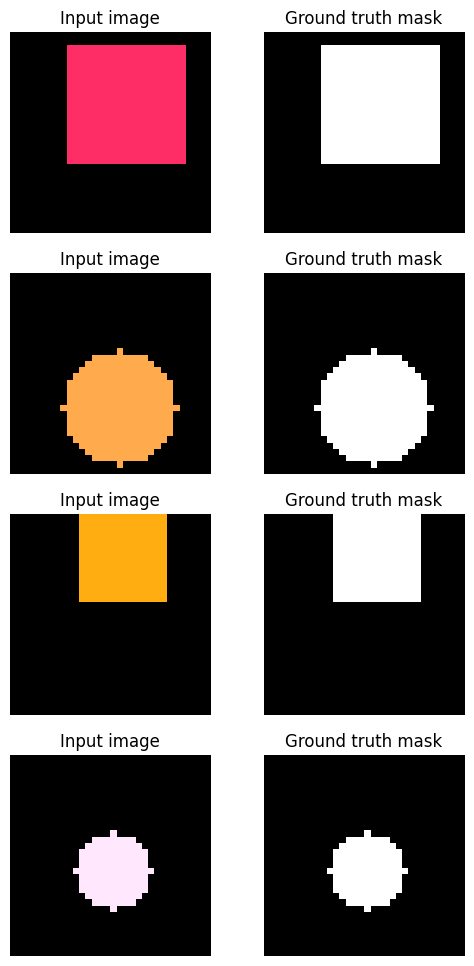

In [4]:
fig = plt.figure(figsize=(6, 12))

for img_index, single_dl_element in enumerate(train_dl.dataset):    
    if img_index == 4:
        break
    # Input
    numpy_input = single_dl_element.input.detach().cpu().numpy()
    ax = fig.add_subplot(4, 2, img_index*2+1)
    ax.imshow(numpy_input)
    ax.axis('off')
    ax.set_title("Input image")
    # Mask
    numpy_mask = single_dl_element.target.detach().cpu().numpy()
    ax = fig.add_subplot(4, 2, img_index*2+2)
    ax.imshow(numpy_mask, cmap='gray')
    ax.axis('off')
    ax.set_title("Ground truth mask")

plt.show()

In [5]:
# Load pretrained model
model = UNet(
    nb_classes=params.out_channels,
    nb_input_channels=len(params.c_indexes) * len(params.z_indexes),
)
manager = ModelManager(model, params, PCC)

optimizer = optim.Adam(
    model.parameters(),
    lr=float(params.learning_rate),
    betas=(params.beta1, params.beta2),
)  # define the optimization
loss_function = nn.L1Loss()

Current commit hash: da15d8c09a597090ae04d0b930120f6114a96cbd


In [6]:
manager.fit(train_dl, val_dl, optimizer, loss_function)

Training in progress: 100.0% | Local step 50 | Epoch 50
Best model saved at epoch 35.

Training successfully finished in 0:05:18.748005.


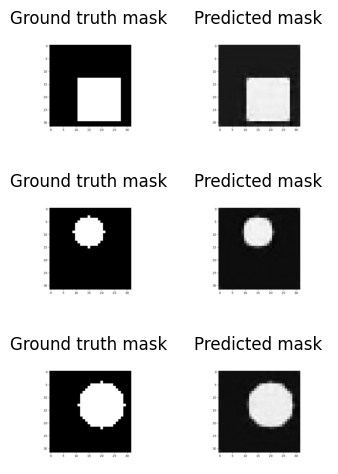

In [7]:
manager.display_training_images()

In [9]:
manager.predict(test_dl)

Model evaluation in progress: 100.0% | Batch #6
Average PCC: 0.99
